In [ ]:
Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions 

Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [1]:
#Start

In [51]:
#Imports
import pandas as pd
pd.set_option('max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ast import literal_eval
import datetime as dt

In [3]:
#path
fpath = "data/movies.csv"

In [4]:
df=pd.read_csv(fpath,index_col=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              36 non-null     int64  
 1   url             36 non-null     object 
 2   name            36 non-null     object 
 3   season          36 non-null     int64  
 4   number          36 non-null     int64  
 5   type            36 non-null     object 
 6   airdate         36 non-null     object 
 7   airtime         36 non-null     object 
 8   runtime         36 non-null     int64  
 9   rating          36 non-null     float64
 10  summary         36 non-null     object 
 11  medium_image    36 non-null     object 
 12  original_image  36 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.9+ KB


In [24]:
df.shape

(36, 13)

In [26]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,rating,summary,medium_image,original_image
0,869671,https://www.tvmaze.com/episodes...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free...,https://static.tvmaze.com/uploa...,https://static.tvmaze.com/uploa...
1,911201,https://www.tvmaze.com/episodes...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone i...,https://static.tvmaze.com/uploa...,https://static.tvmaze.com/uploa...
2,911204,https://www.tvmaze.com/episodes...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigat...,https://static.tvmaze.com/uploa...,https://static.tvmaze.com/uploa...
3,911205,https://www.tvmaze.com/episodes...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and...,https://static.tvmaze.com/uploa...,https://static.tvmaze.com/uploa...
4,927174,https://www.tvmaze.com/episodes...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on...,https://static.tvmaze.com/uploa...,https://static.tvmaze.com/uploa...


## ● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

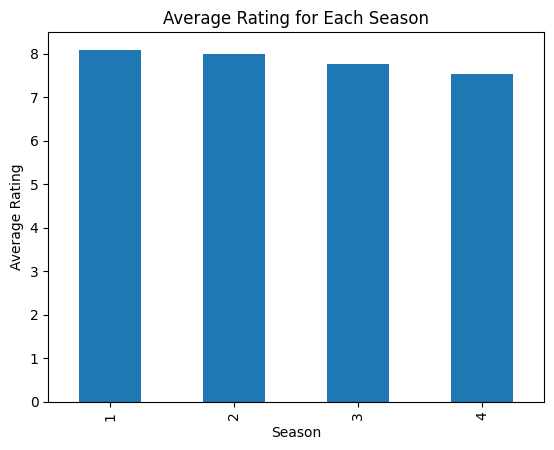

In [36]:
season_ratings = df.groupby("season")["rating"].mean().sort_index()
season_ratings.plot(kind="bar")
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.title("Average Rating for Each Season")
plt.show()

## ● Get all the episode names, whose average rating is more than 8 for every season

In [52]:
highly_rated_episodes = df.loc[df["rating"] > 8, ["season", "name"]]
highly_rated_episodes

,season,name
6,1,Trompe L'Oeil
8,1,The Well-Tempered Clavier
9,1,The Bicameral Mind
17,2,Kiksuya
18,2,Vanishing Point
19,2,The Passenger


In [53]:
highly_rated_episodes.groupby("season").agg(lambda x: ", ".join(x)).reset_index()

,season,name
0,1,"Trompe L'Oeil, The Well-Tempered Clavier, The Bicameral Mind"
1,2,"Kiksuya, Vanishing Point, The Passenger"


## ● Get all the episode names that aired before May 2019

In [57]:
early_episodes = df.loc[df["airdate"] < "2019-05-01", "name"]
early_episodes

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

In [56]:
print(f"There are {early_episodes.shape[0]} episodes that aired before May 2019")

There are 20 episodes that aired before May 2019


## ● Get the episode name from each season with the highest and lowest rating

In [60]:
highest_rated_episodes = df.loc[df.groupby("season")["rating"].idxmax(), ["season", "name", "rating"]]
lowest_rated_episodes = df.loc[df.groupby("season")["rating"].idxmin(), ["season", "name", "rating"]]

In [61]:
#Highest Rating Episodes
highest_rated_episodes

,season,name,rating
9,1,The Bicameral Mind,8.7
17,2,Kiksuya,8.7
20,3,Parce Domine,8.0
32,4,Zhuangzi,7.8


In [62]:
#Lowest Rating Episodes
lowest_rated_episodes

,season,name,rating
2,1,The Stray,7.6
14,2,Akane No Mai,7.6
25,3,Decoherence,7.5
28,4,The Auguries,7.1


## ● Get the summary for the most popular ( ratings ) episode in every season

In [63]:
most_popular_episodes = df.loc[df.groupby("season")["rating"].idxmax(), ["season", "name", "summary"]]

In [64]:
most_popular_episodes

,season,name,summary
9,1,The Bicameral Mind,"Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative."
17,2,Kiksuya,"Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering."
20,3,Parce Domine,"If you're stuck in a loop, try walking in a straight line."
32,4,Zhuangzi,God is bored.
